In [158]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal as scps
from scipy.ndimage import gaussian_filter as gaussfilt

%matplotlib notebook

# Praktični primeri: Vaja 3 (1/3)

## Konvolucija in filtriranje

### Računanje konvolucije

1. Na roke izračunajte konvolucijo spodaj podanega signala in jedra $(k * f)$

``f = [0, 0.3, 0.3, 1, 1, 0.2, 0.3, 0.2, 0.7, 0.7, 1, 0]``

``k = [0.4, 1, 0.2]``

In [159]:
f = np.array([0, 0.3, 0.3, 1, 1, 0.2, 0.3, 0.2, 0.7, 0.7, 1, 0])
k = np.array([0.5, 1, 0.3])

f_corr = np.correlate(f, k, 'valid')
print(f_corr)

[0.39 0.75 1.45 1.56 0.79 0.46 0.56 1.01 1.35 1.35]


In [160]:
f_conv1 = np.convolve(f, k, 'valid')
print(f_conv1)

f_conv2 = scps.convolve(f, k, 'valid')
print(f_conv2)

[0.45 0.89 1.59 1.4  0.65 0.46 0.64 1.11 1.41 1.21]
[0.45 0.89 1.59 1.4  0.65 0.46 0.64 1.11 1.41 1.21]


<IPython.core.display.Javascript object>


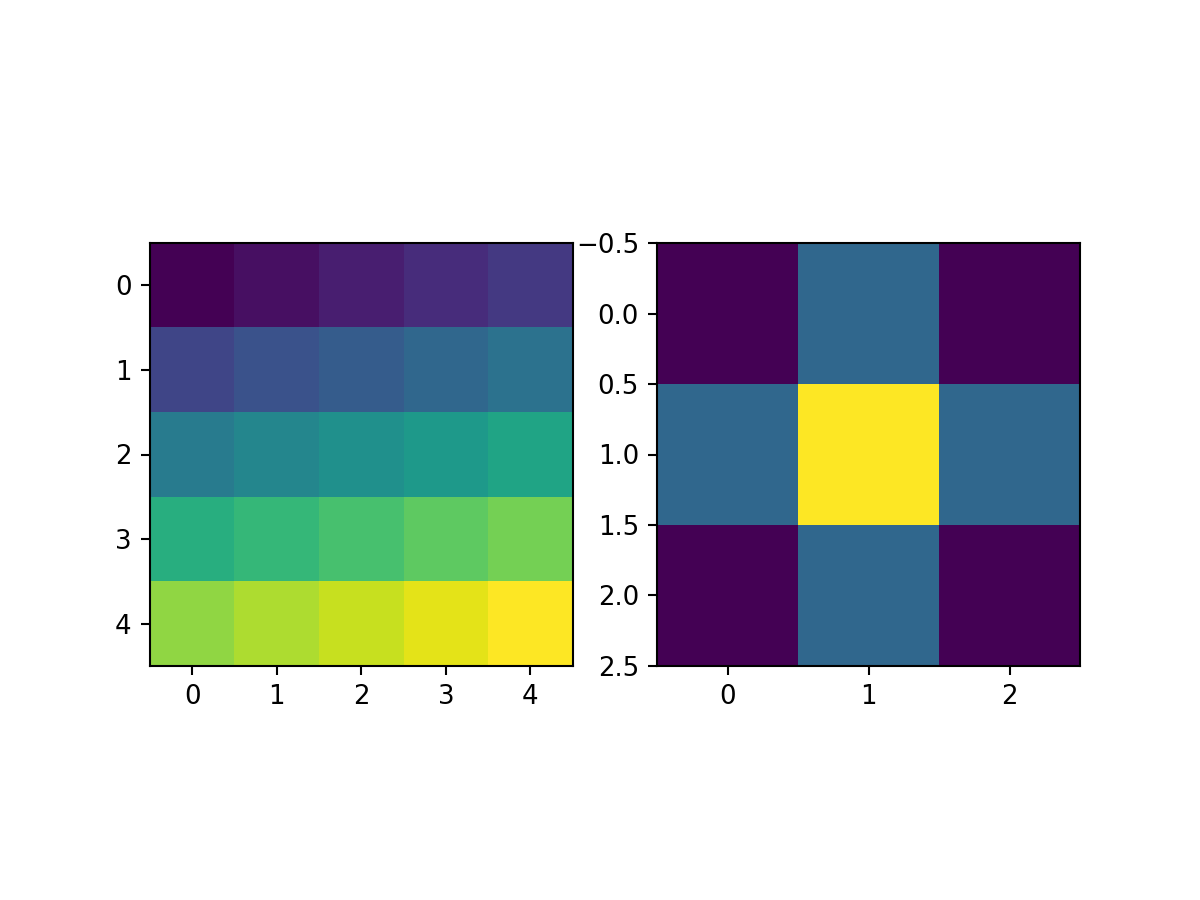

In [161]:
I = np.array([[1,2,3,4,5], [6,7,8,9,10], [11,12,13,14,15], [16,17,18,19,20], [21, 22, 23, 24, 25]])
K = np.array([[0.2, 0.3, 0.2], [0.3, 0.5, 0.3], [0.2, 0.3, 0.2]])

plt.figure()
plt.subplot(121)
plt.imshow(I)
plt.subplot(122)
plt.imshow(K)

In [162]:
I_corr = scps.correlate2d(I, K, 'valid')
print(I_corr.shape)

(3, 3)


<IPython.core.display.Javascript object>


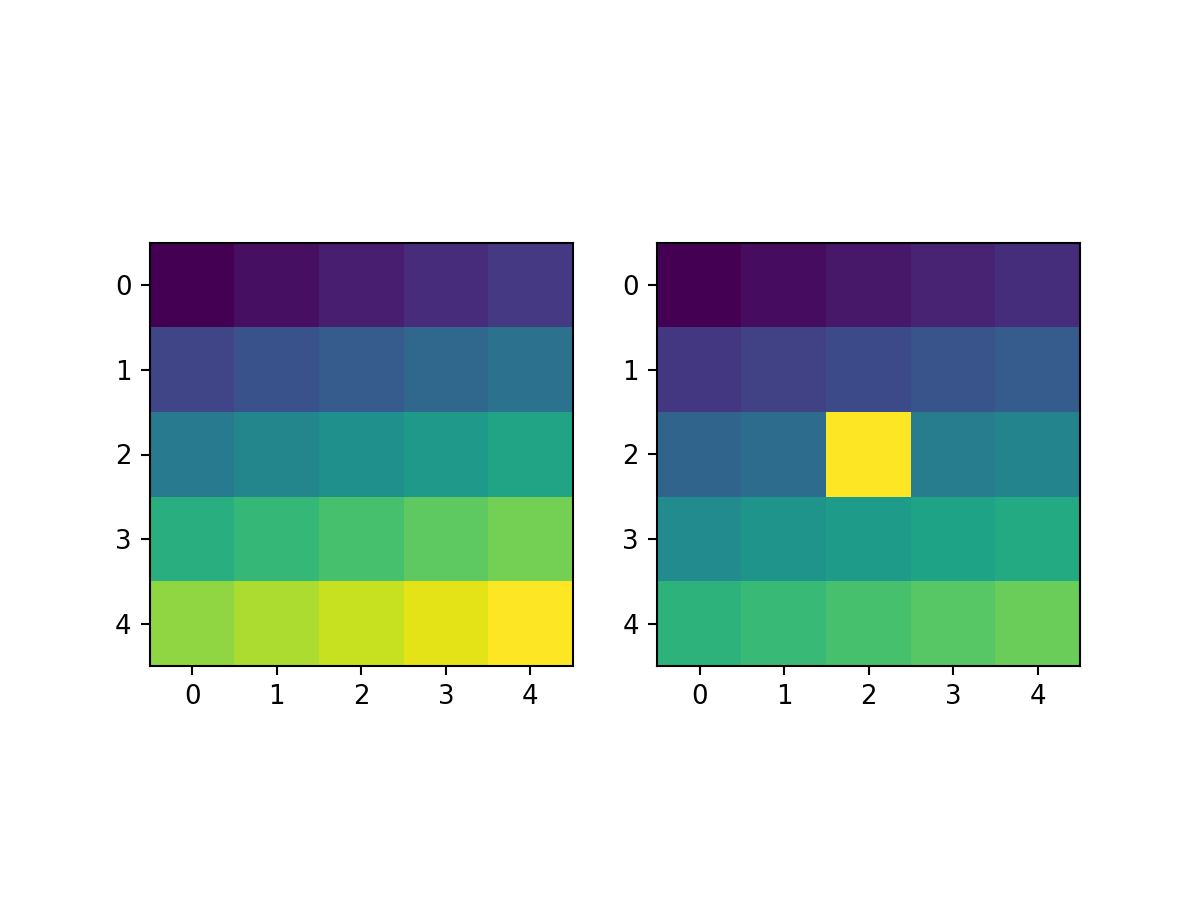

In [163]:
I_2 = np.copy(I)
I_2[2, 2] = scps.correlate2d(I[1:4, 1:4], K, 'valid')

plt.figure()
plt.subplot(121)
plt.imshow(I)
plt.subplot(122)
plt.imshow(I_2)

In [164]:
print(np.sum(K))

2.5


<IPython.core.display.Javascript object>


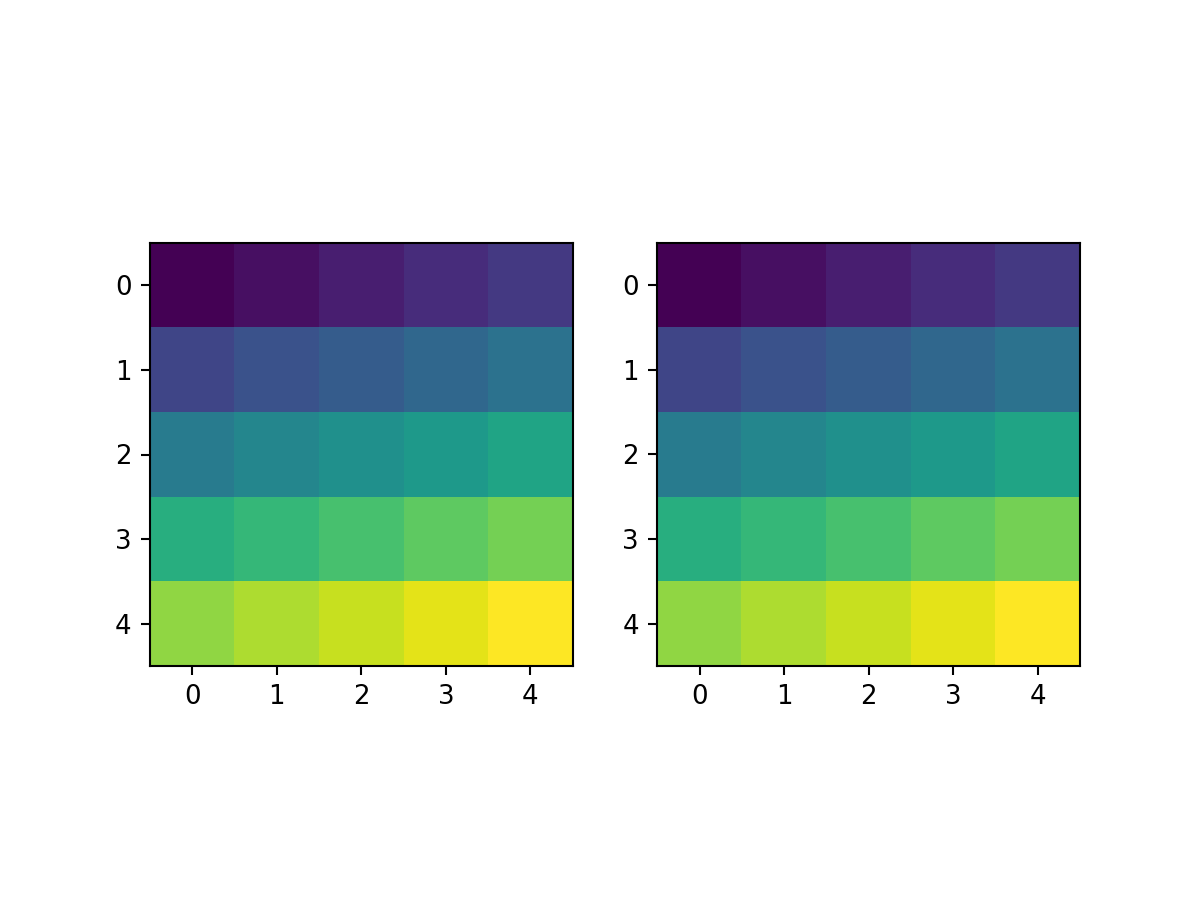

13
13


In [165]:
K_povprecja = 1/9 * np.ones((3, 3))

I_3 = np.copy(I)
I_3[2, 2] = scps.correlate(I[1:4, 1:4], K_povprecja, 'valid')

plt.figure()
plt.subplot(121)
plt.imshow(I)
plt.subplot(122)
plt.imshow(I_3)

print(I[2, 2])
print(I_3[2, 2])

<IPython.core.display.Javascript object>


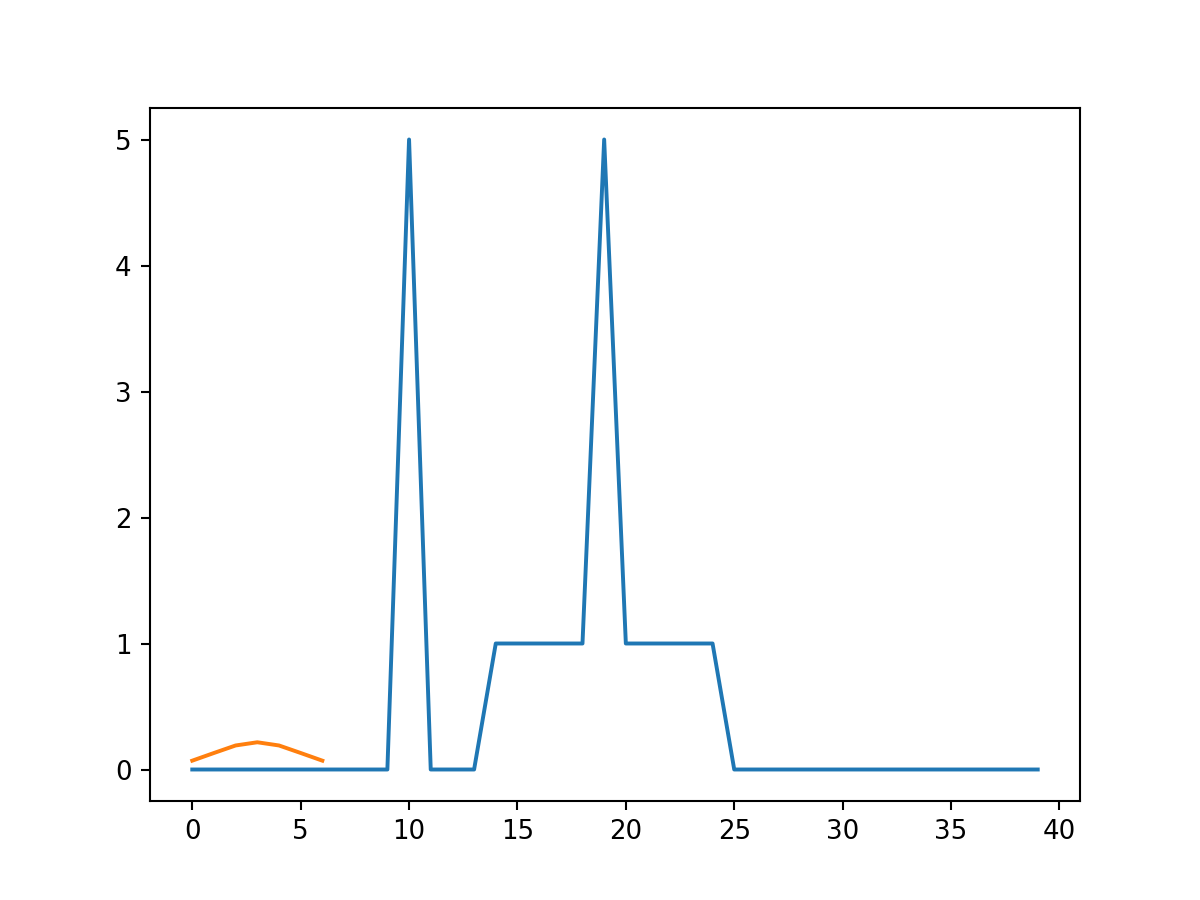

In [166]:
signal = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 5.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
kernel = scps.gaussian(7, 2)
kernel /= np.sum(kernel)

plt.figure()
plt.plot(signal)
plt.plot(kernel)

<IPython.core.display.Javascript object>


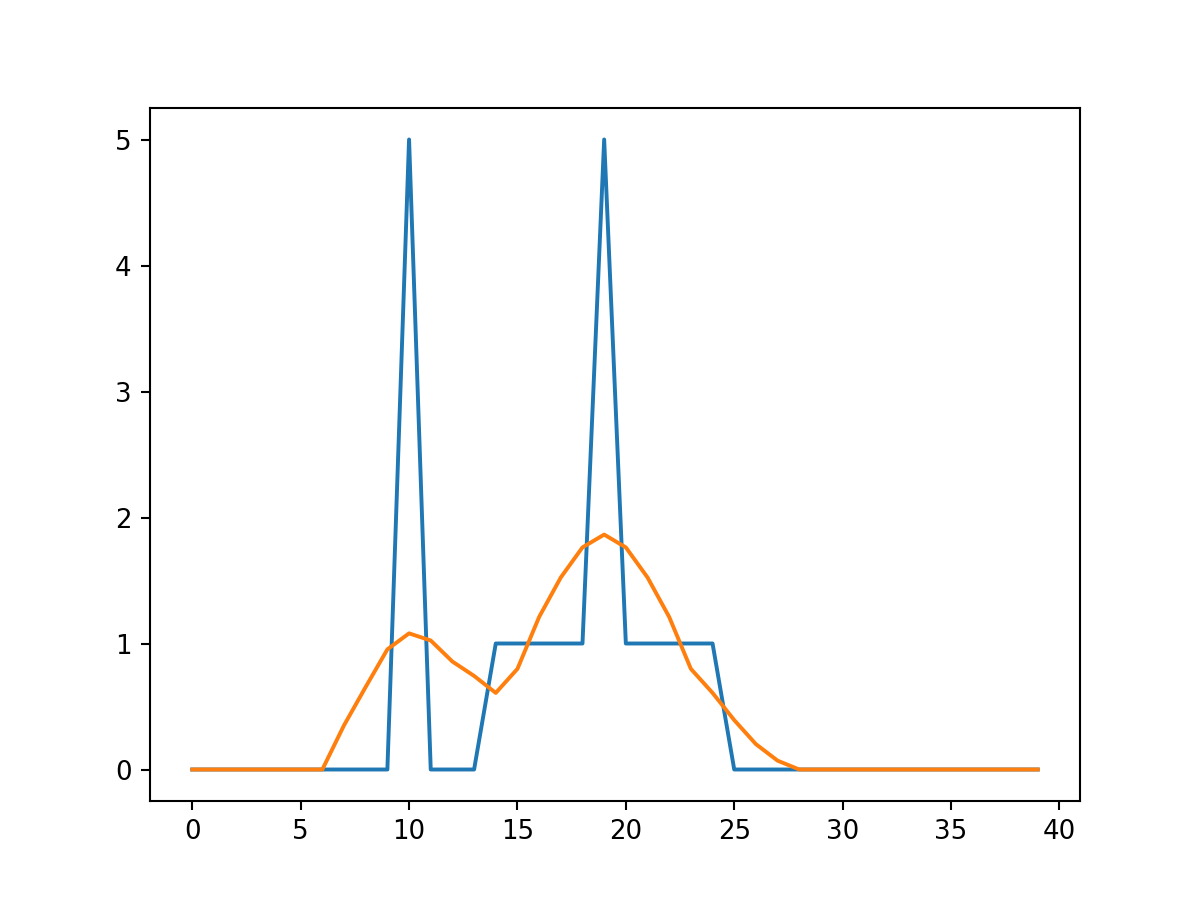

In [167]:
signal_corr = np.correlate(signal, kernel, 'same')

plt.figure()
plt.plot(signal)
plt.plot(signal_corr)

<IPython.core.display.Javascript object>


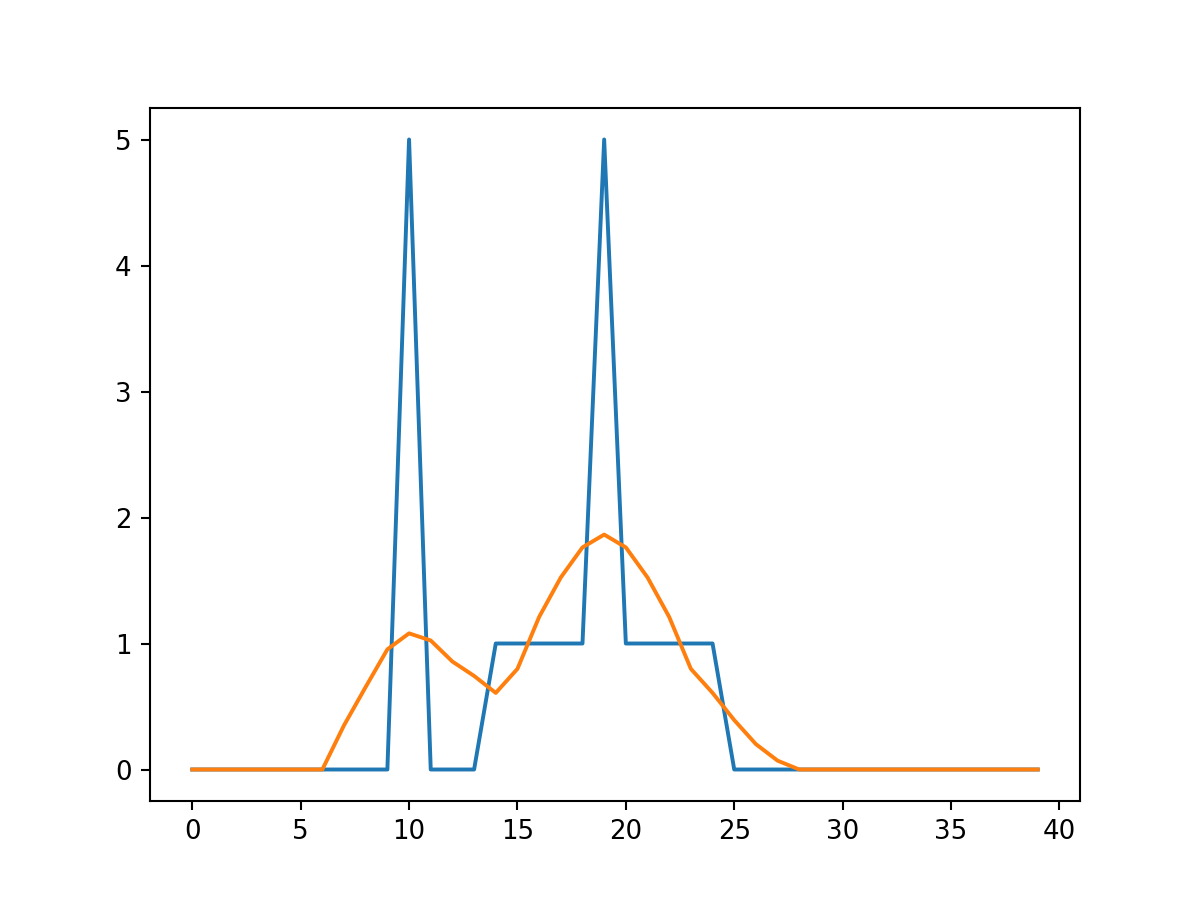

In [168]:
signal_conv = scps.convolve(signal, kernel, 'same')
plt.figure()
plt.plot(signal)
plt.plot(signal_conv)

<IPython.core.display.Javascript object>


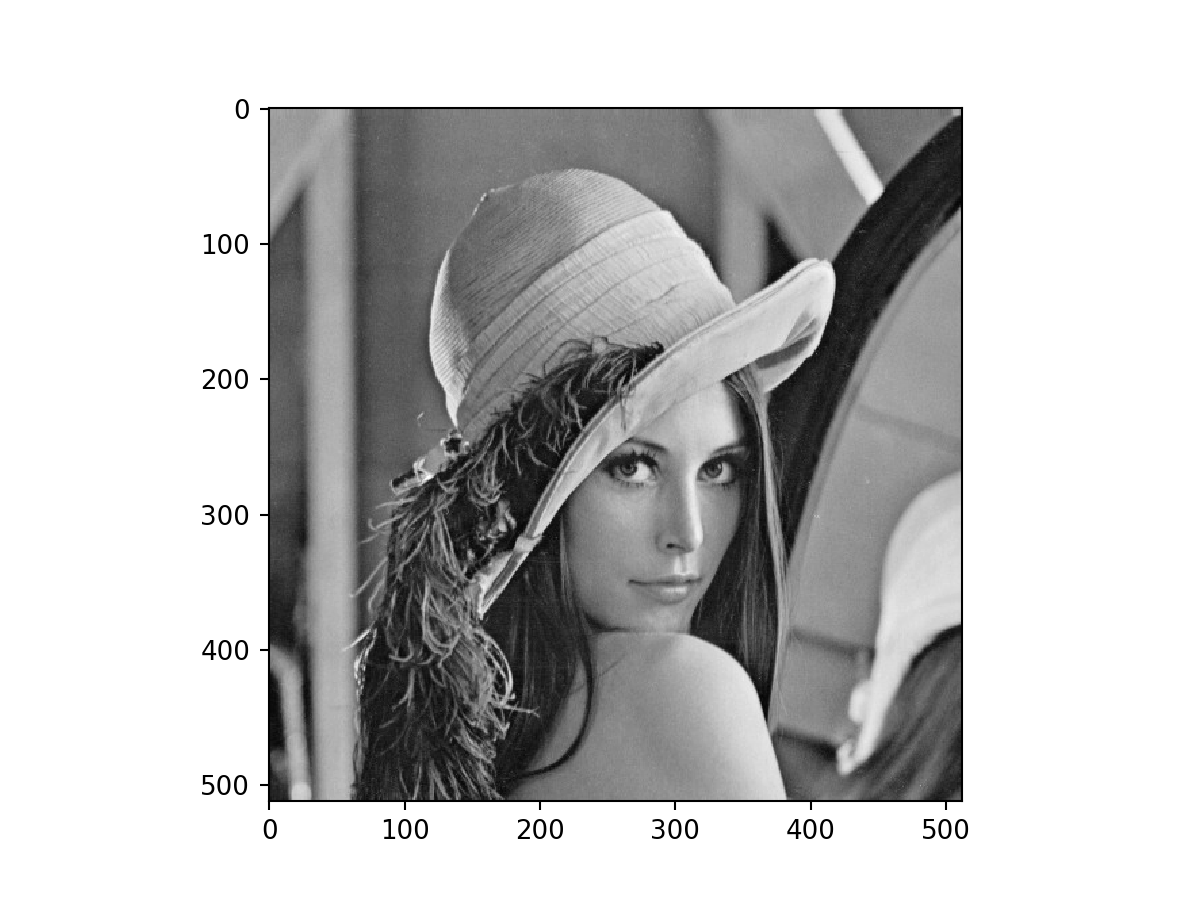

In [169]:
I_lena = cv2.cvtColor(cv2.imread('material/lena.png'), cv2.COLOR_BGR2GRAY)
plt.figure()
plt.imshow(I_lena, cmap='gray')

<IPython.core.display.Javascript object>


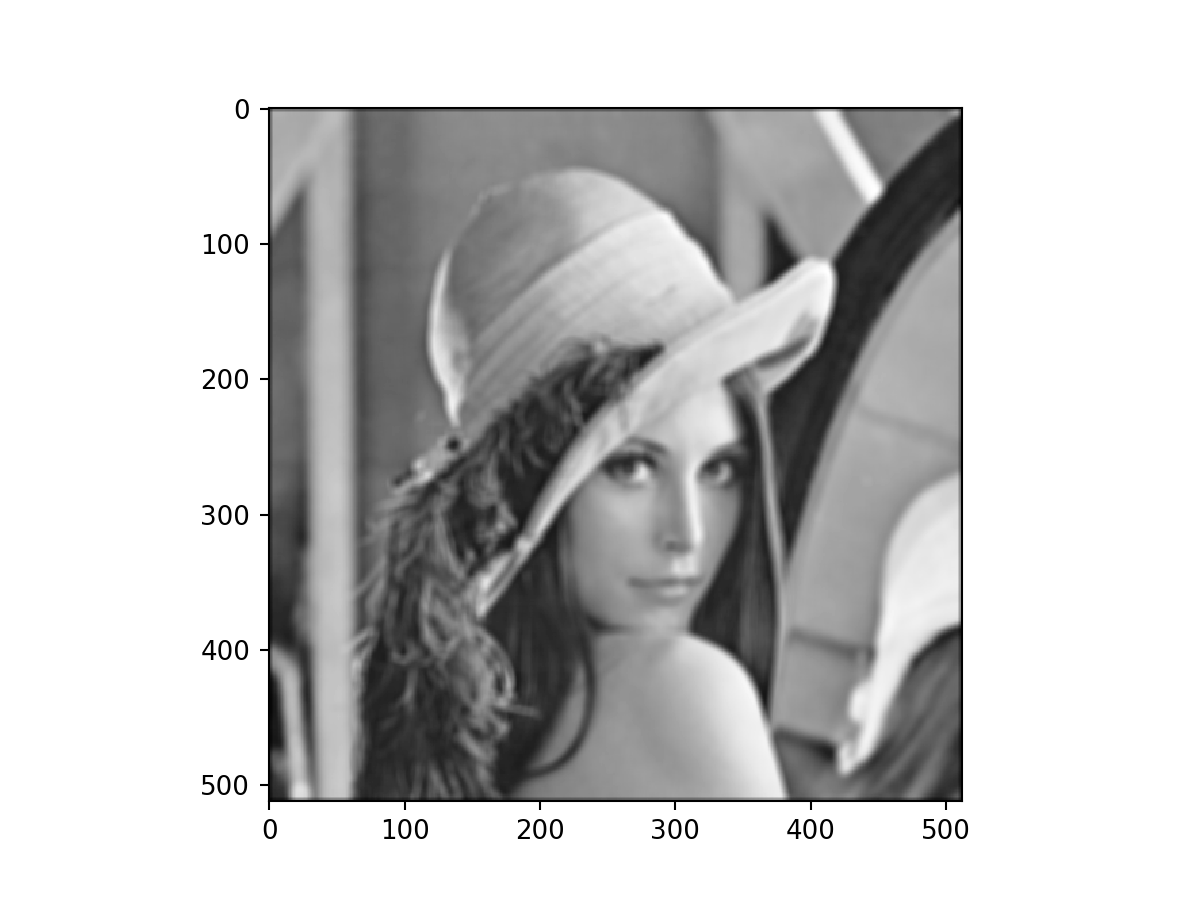

In [170]:
K_povprecen = np.ones((7, 7)) / (7*7)

I_smooth = scps.convolve2d(I_lena, K_povprecen, 'same')

plt.figure()
plt.imshow(I_smooth, cmap='gray')

1.0


<IPython.core.display.Javascript object>


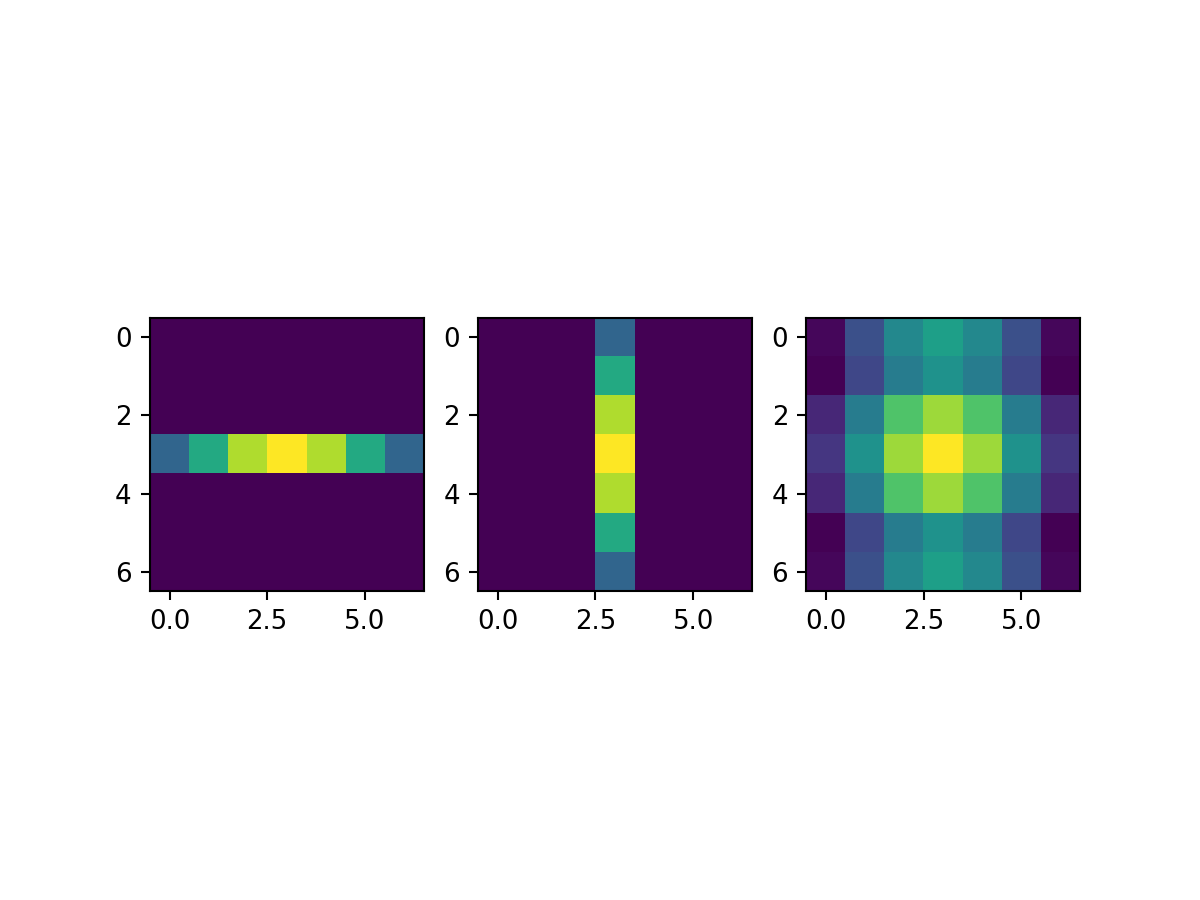

In [171]:
K_gauss_x = scps.gaussian(7, 2)
K_gauss_x2D = np.zeros((7, 7))
K_gauss_x2D[3, :] = K_gauss_x

K_gauss_x_norm = K_gauss_x / np.sum(K_gauss_x)
K_gauss_y_norm = np.transpose(K_gauss_x) / np.sum(K_gauss_x)

K_gauss_y2D = np.zeros((7, 7))
K_gauss_y2D[:, 3] = np.transpose(K_gauss_x)

K_gauss = cv2.filter2D(K_gauss_x2D, -1, K_gauss_y2D)
K_gauss /= np.sum(K_gauss)
print(np.sum(K_gauss))

plt.figure()
plt.subplot(131)
plt.imshow(K_gauss_x2D / np.sum(K_gauss_x2D))
plt.subplot(132)
plt.imshow(K_gauss_y2D / np.sum(K_gauss_y2D))
plt.subplot(133)
plt.imshow(K_gauss)


<IPython.core.display.Javascript object>


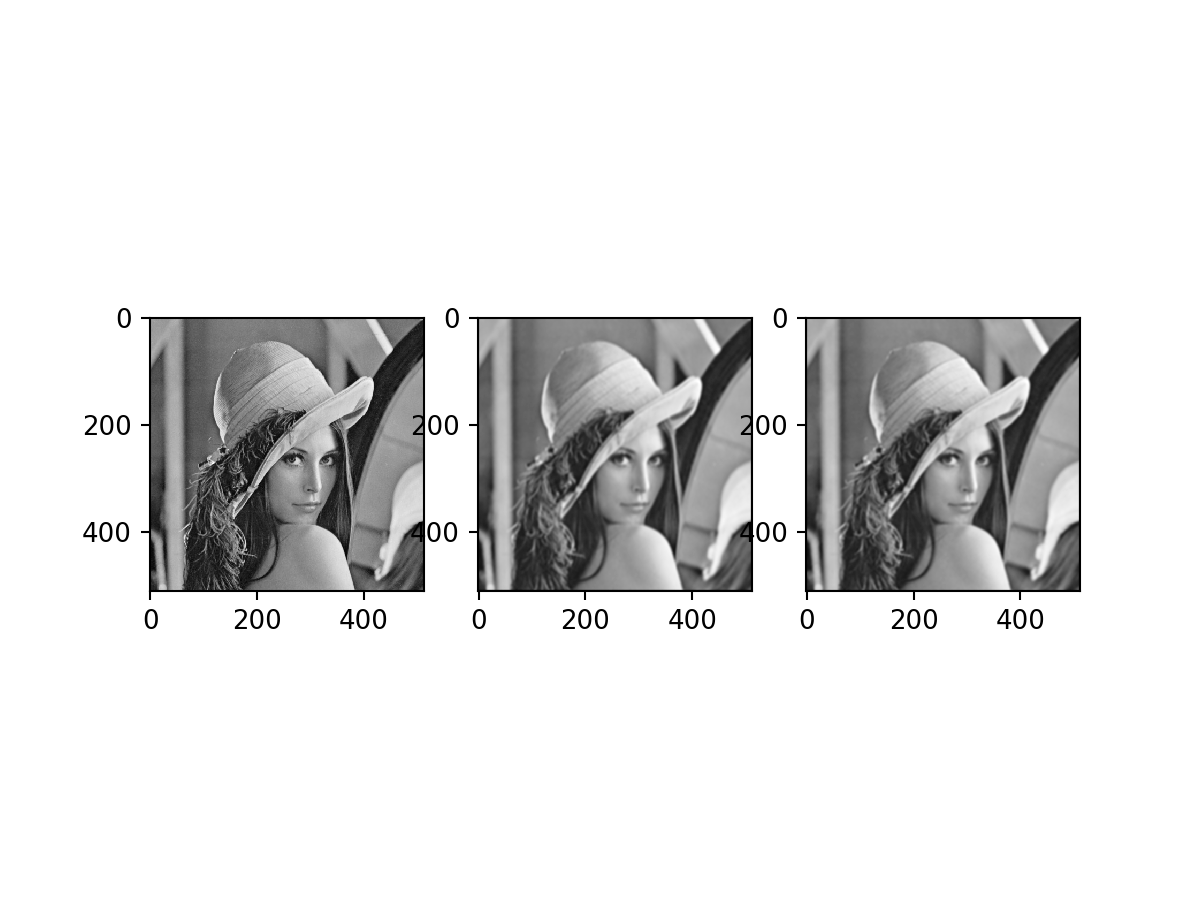

In [172]:
#I_lena_gauss1 = cv2.filter2D(I_lena, -1, K_gauss)
#I_lena_gauss2 = cv2.filter2D(cv2.filter2D(I_lena, -1, K_gauss_x2D), -1, K_gauss_y2D)

I_lena_gauss1 = scps.convolve2d(I_lena, K_gauss, 'same')
I_lena_gauss2 = scps.convolve2d(scps.convolve2d(I_lena, K_gauss_x2D / np.sum(K_gauss_x2D), 'same'), K_gauss_y2D / np.sum(K_gauss_y2D), 'same')
plt.figure()
plt.subplot(131)
plt.imshow(I_lena, cmap='gray')
plt.subplot(132)
plt.imshow(I_lena_gauss1, cmap='gray')
plt.subplot(133)
plt.imshow(I_lena_gauss2, cmap='gray')

<IPython.core.display.Javascript object>


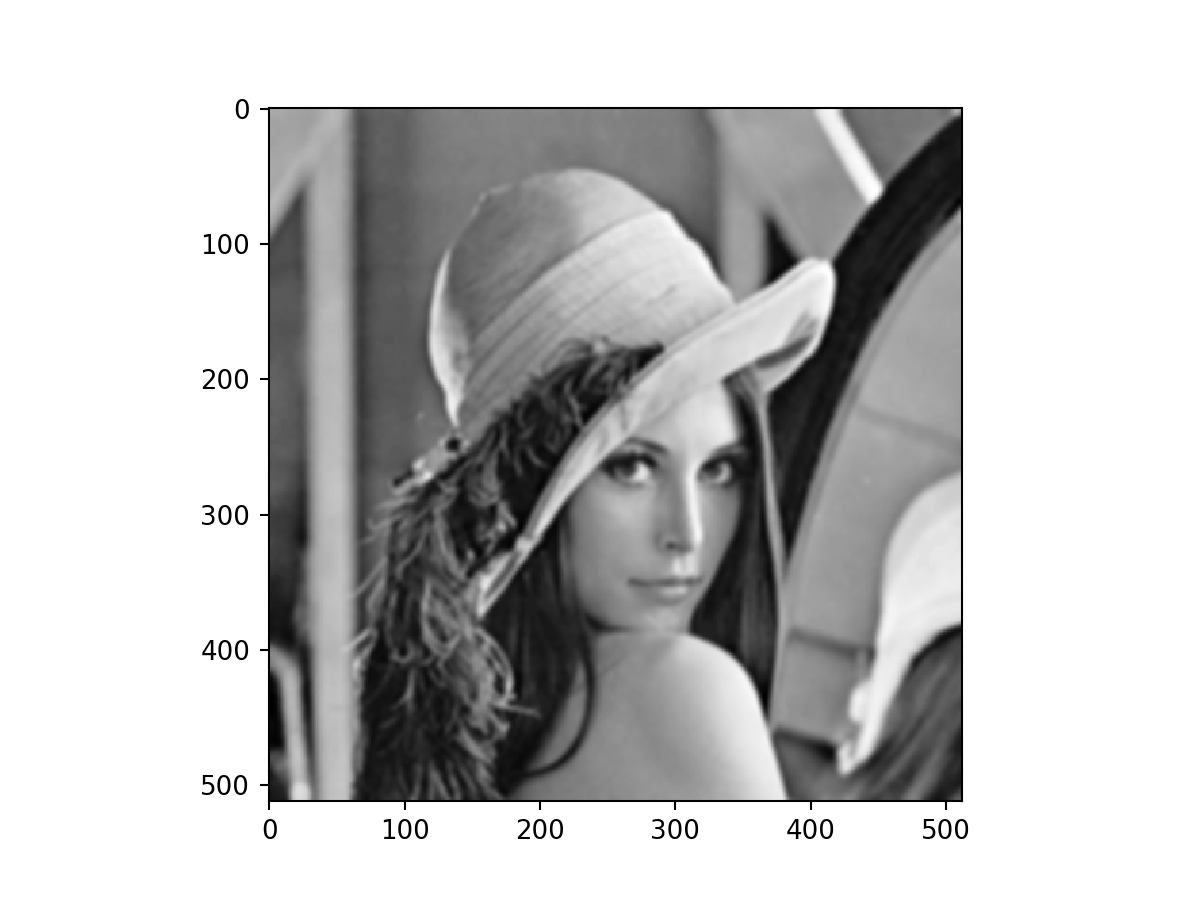

In [173]:
I_lena_gauss_sep = cv2.sepFilter2D(I_lena, -1, K_gauss_x_norm, K_gauss_y_norm)

plt.figure()
plt.imshow(I_lena_gauss_sep, cmap='gray')